<div style="color:white;display:fill;border-radius:2px;background-color:#065222;font-size:32px;font-family:Nexa;letter-spacing:0.5px">
        <p style="padding: 10px;color:#f2f2f2;"><b>ML-Time series</b></p>
</div>
<h3>To -prdict and -forecast the trend of 'airline passengers' over the time.

 <center><img src="airlines.png" width="600" ></center> 

# __Steps: For ML-Time series__
1. Explore Dataset - Data Wrangling
2. Visualize the Dataset
3. Stationarity check
4. Making data stationary
5. Autoregression Using ACF and PACF (Plots)
6. ARIMA Model
7. SARIMAX Model
8. Prediction
9. Forecasting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

# Ingnore Warnings
import warnings
warnings.filterwarnings("ignore")

## __01 Explore Dataset - Data Wrangling__

In [2]:
# Read Passengers data
df=pd.read_csv(r'AirPassengers.csv')
df.head()
# df.plot()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
# df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)
df['Month']=pd.to_datetime(df['Month'],infer_datetime_format=True)
# This coverts data into int.

In [5]:
# Setting time info Month as index to work with.
df.set_index('Month', inplace = True)

In [6]:
from datetime import datetime
# df.head()
df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [7]:
df.dtypes
# infer_datetime_format=True: Float to int???

#Passengers    int64
dtype: object

## __02: Visualize the Dataset__

<Axes: xlabel='Month'>

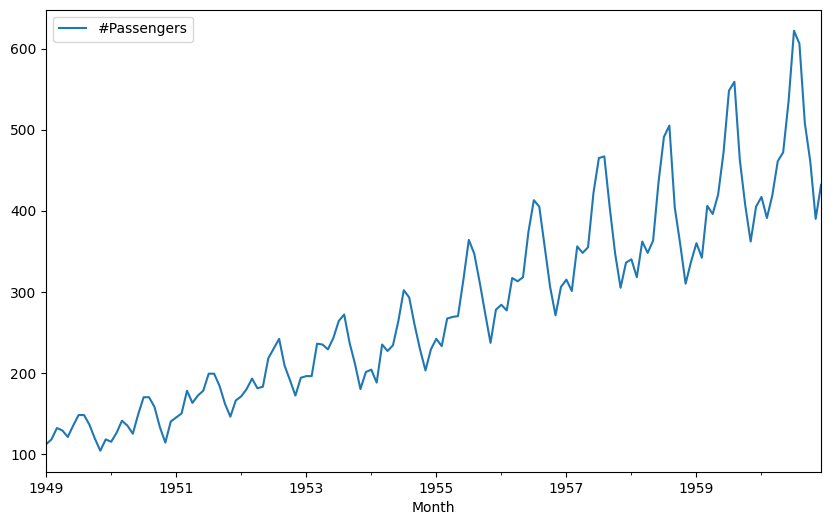

In [8]:
## Plot Graph 
df.plot()

## __03 Stationarity check__

### __Dickey-Fuller Test:__
- Define ADF Function Testing For Stationarity

In [9]:
# Perform Dickey-Fuller Test:
from statsmodels.tsa.stattools import adfuller
# Null Hypothesis Says (Ho): Data is non stationary

def adfuller_test(input):

    
    #Determining rolling statistics
    movingAverage = input.rolling(window=12).mean()
    movingSTD = input.rolling(window=12).std()

    # Plot Rolling Statistics:
    orig= plt.plot(input, color='blue',label='Original')
    mean= plt.plot(movingAverage, color='red',label='Rolling Mean')
    std= plt.plot(movingSTD, color='black',label='Rolling Std')

    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print ('Results of Dickey_Fuller Test:')
    result = adfuller(input, autolag='AIC')
    df_output=pd.Series(result[0:4], index=['Test Statistic','P-Value','#Lags Used','Number of Observations Used'])
    for key,value in result[4].items():
        df_output['Critical Value (%s)' %key]=value
    print(df_output)
    
    if result[key=='P-value'] <= 0.05:
        print("Since P-Value: is <= 0.05, Reject the null hypothesis. Data is stationary")
    else:
        print("Since P-Value: is > 0.05,  Cannot reject the Null Hypothesis. Data it is non-stationary ")
        

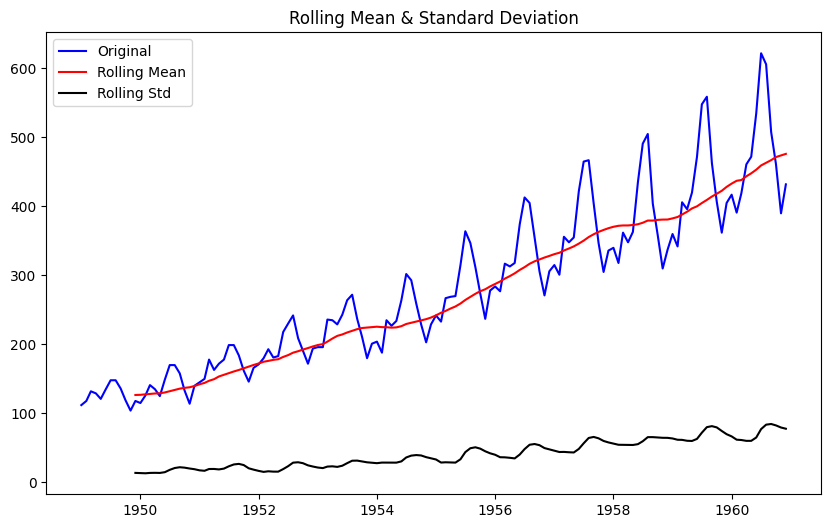

Results of Dickey_Fuller Test:
Test Statistic                   0.815369
P-Value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Since P-Value: is > 0.05,  Cannot reject the Null Hypothesis. Data it is non-stationary 


In [10]:
# adfuller_test(df['#Passengers'])
# test_stationarity(df['#Passengers'])
adfuller_test(df)

### __Decomposition__ Approach for Forecastings.
- There are two ways in which we can decompose the time series:
- __Multiplicative : y(t) = T(t) * S(t) * R(t)__
- __Additive : y(t) = T(t) + S(t) + R(t)__
- use decomposition to __mainly view componets__
- use it to select model, to decompose and forecast
- we can use it assertine the results by viewing graphs.
- Decomposition is aslo used for forcasting, it is another approach.
- we have components and apply prediction on each and combine them to get our value?
- The forecast is made by considering each of these components separately and then combining them together.

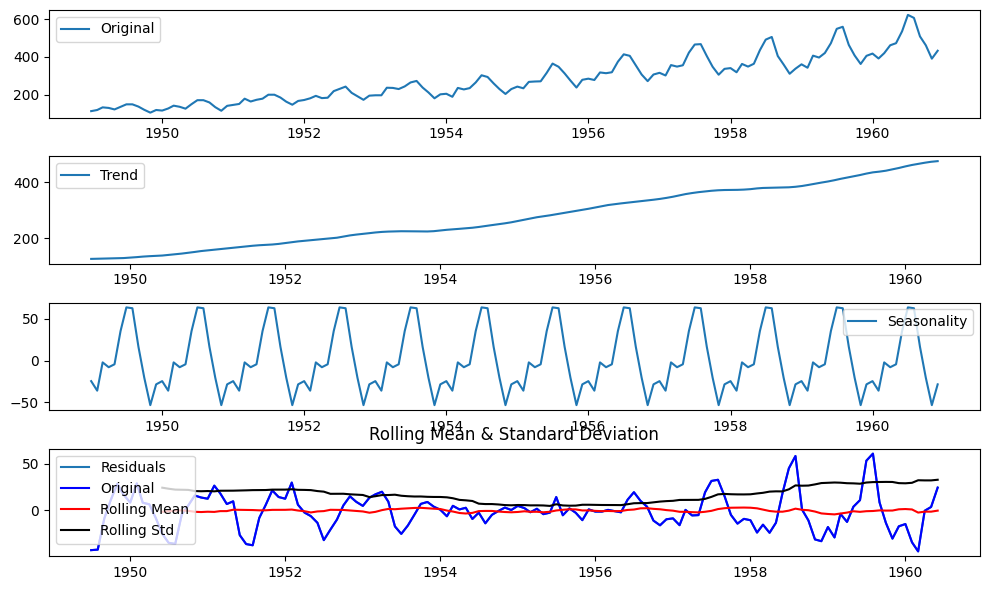

Results of Dickey_Fuller Test:
Test Statistic                  -5.298428
P-Value                          0.000006
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64
Since P-Value: is <= 0.05, Reject the null hypothesis. Data is stationary


In [11]:
# Look at the Time Series Components
# Trend, Sesonality, Residuals and the Original Series
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['#Passengers'])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df['#Passengers'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
adfuller_test(decomposedLogData)
# KEY ERROR

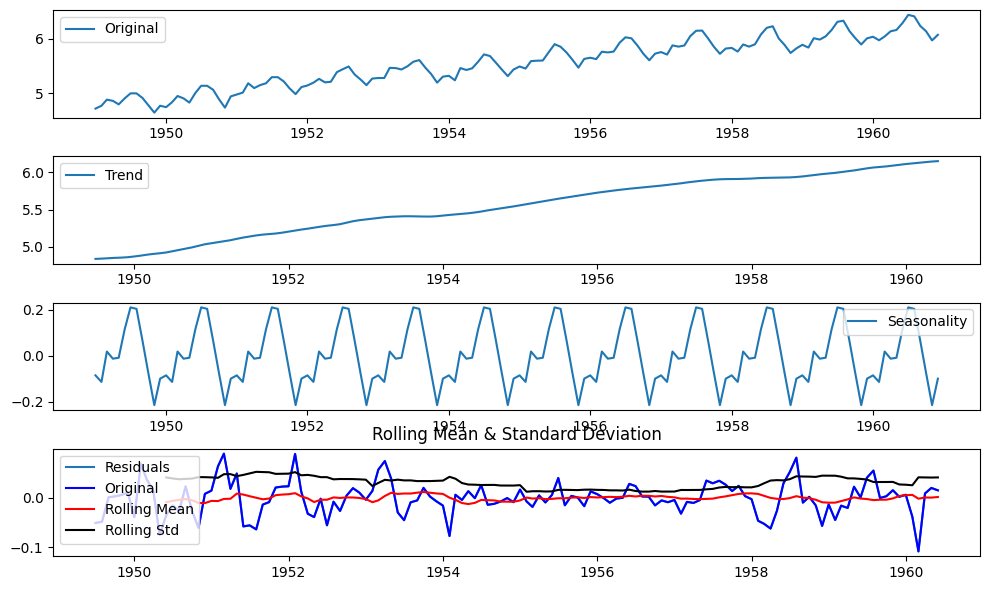

Results of Dickey_Fuller Test:
Test Statistic                -6.332387e+00
P-Value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64
Since P-Value: is <= 0.05, Reject the null hypothesis. Data is stationary


In [12]:
# Look at the Time Series Components
# Trend, Sesonality, Residuals and the Original Series
# Estimating trend With Log Scale
df_logScale=np.log(df)
# plt.plot(df_logScale)

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
adfuller_test(decomposedLogData)
# KEY ERROR

In [13]:
# decomposition = seasonal_decompose(df_logScale)
add_result= seasonal_decompose(df['#Passengers'], model='additive')
mul_result= seasonal_decompose(df['#Passengers'], model='multiplicative')
# Check for Residulal flatness to use the additive or multiplicative model.
# Residuals should me more flater for better model
# Decomosition comonents are used for 'assesment' (viewing) of how the timeserice is in these parameters.
# We can use decomposition again on decomposed data to check these components .

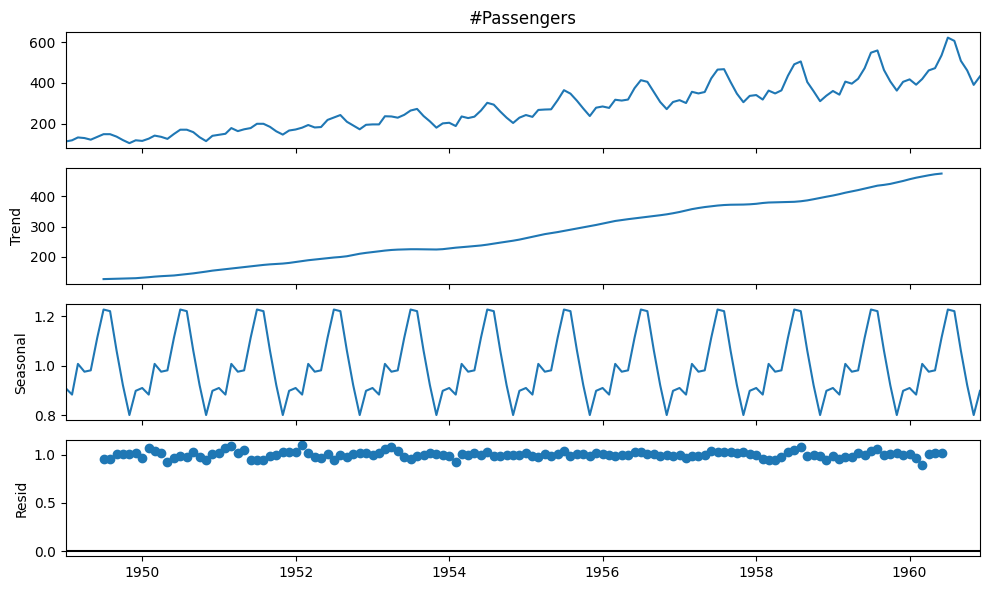

In [14]:
mul_result.plot()
# add_result.plot()
plt.show()

In [15]:
#Additive
new_df_add = pd.concat([add_result.seasonal, add_result.trend, add_result.resid, add_result.observed], axis=1)
new_df_add.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_add.head(5)

,seasoanilty,trend,residual,actual_values
Month,,,,
1949-01-01,-24.748737,NaN,NaN,112.0
1949-02-01,-36.188131,NaN,NaN,118.0
1949-03-01,-2.241162,NaN,NaN,132.0
1949-04-01,-8.036616,NaN,NaN,129.0
1949-05-01,-4.506313,NaN,NaN,121.0


In [16]:
#Multiplicative
new_df_mult = pd.concat([mul_result.seasonal, mul_result.trend, mul_result.resid, mul_result.observed], axis=1)
new_df_mult.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_mult.head(5)

,seasoanilty,trend,residual,actual_values
Month,,,,
1949-01-01,0.910230,NaN,NaN,112.0
1949-02-01,0.883625,NaN,NaN,118.0
1949-03-01,1.007366,NaN,NaN,132.0
1949-04-01,0.975906,NaN,NaN,129.0
1949-05-01,0.981378,NaN,NaN,121.0


## __04 Making Time Series Stationary__ (For ARIMA)

### Our Steps to Stationarity
1) log scale
2) log scale diiference
3) log scale seasonal differencing.

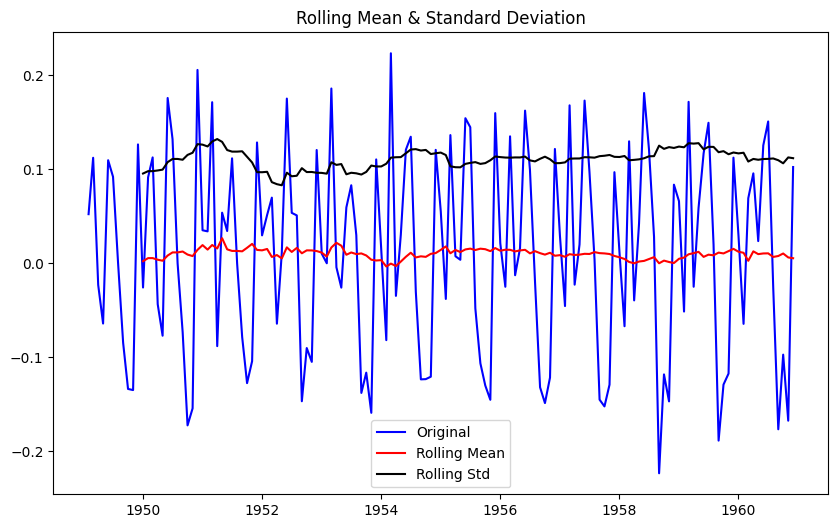

Results of Dickey_Fuller Test:
Test Statistic                  -2.717131
P-Value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64
Since P-Value: is <= 0.05, Reject the null hypothesis. Data is stationary


In [17]:
# Estimating trend With Log Scale
df_logScale=np.log(df)
# plt.plot(df_logScale)

# LDS = LogDiffShifting
LDS = df_logScale - df_logScale.shift(1)
# plt.plot(LDS)

# Test this with the function
LDS.dropna(inplace=True)
# test_stationarity(LDS['#Passengers'])
adfuller_test(LDS)

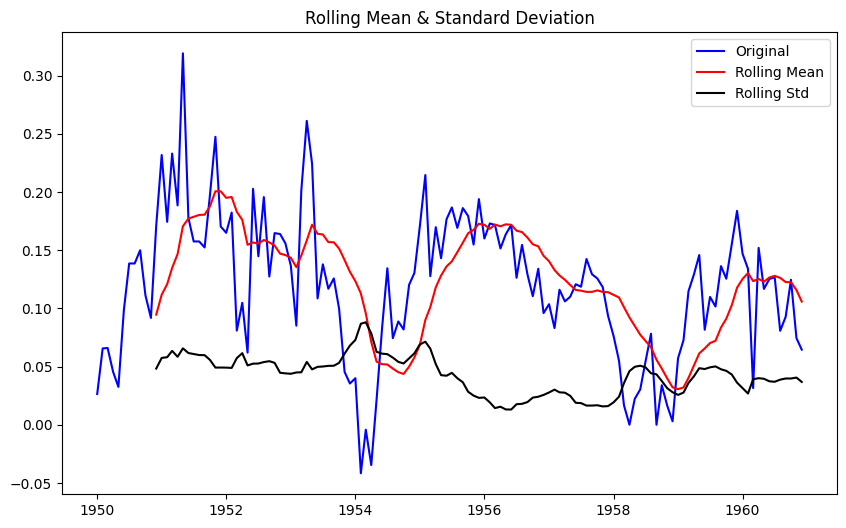

Results of Dickey_Fuller Test:
Test Statistic                  -2.709577
P-Value                          0.072396
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64
Since P-Value: is <= 0.05, Reject the null hypothesis. Data is stationary


In [18]:
# SLDS = SeasonalLogDiffShifting
SLDS = df_logScale - df_logScale.shift(12)
# plt.plot(LDS)

# Test this with the function
SLDS.dropna(inplace=True)
# test_stationarity(SLDS['#Passengers'])
adfuller_test(SLDS)

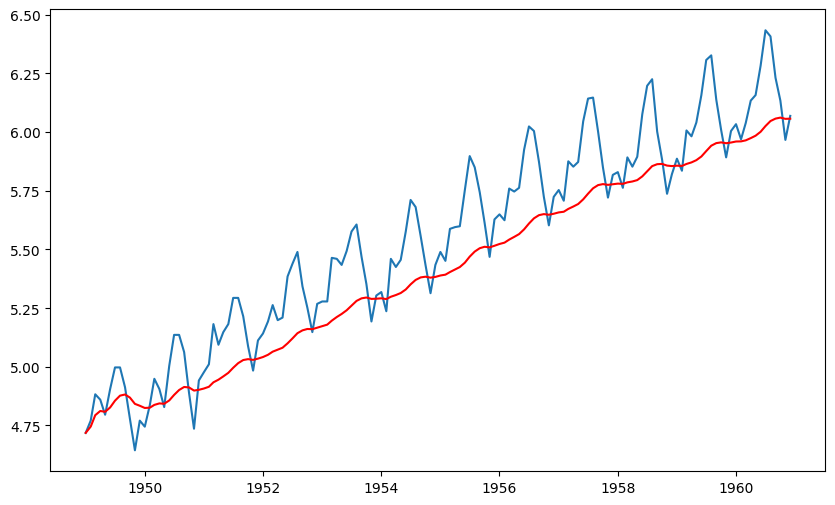

In [19]:
# Weighted Avaerage Caliculation to find the trend in side the time series.
# Trend (EDWA=ExponentialDecayWeightedAverage) (.ewm Estimate Weighted Average method.
EDWA = df_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(df_logScale)
plt.plot(EDWA, color='red')

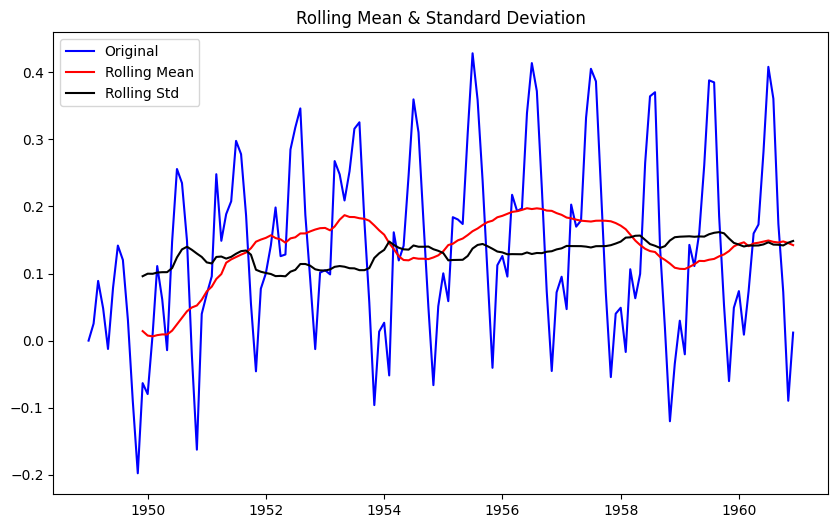

Results of Dickey_Fuller Test:
Test Statistic                  -3.601262
P-Value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
Since P-Value: is <= 0.05, Reject the null hypothesis. Data is stationary


In [20]:
# Testing Statinarity again for this method. using above test function
# dLS_MMA_EDWA = datasetLogScaleMinusMovingExponentialDecayAverage
dLS_MMA_EDWA = df_logScale - EDWA
adfuller_test(dLS_MMA_EDWA['#Passengers'])

## __05 Autoregression Using ACF and PACF__ (Plots)

In [21]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

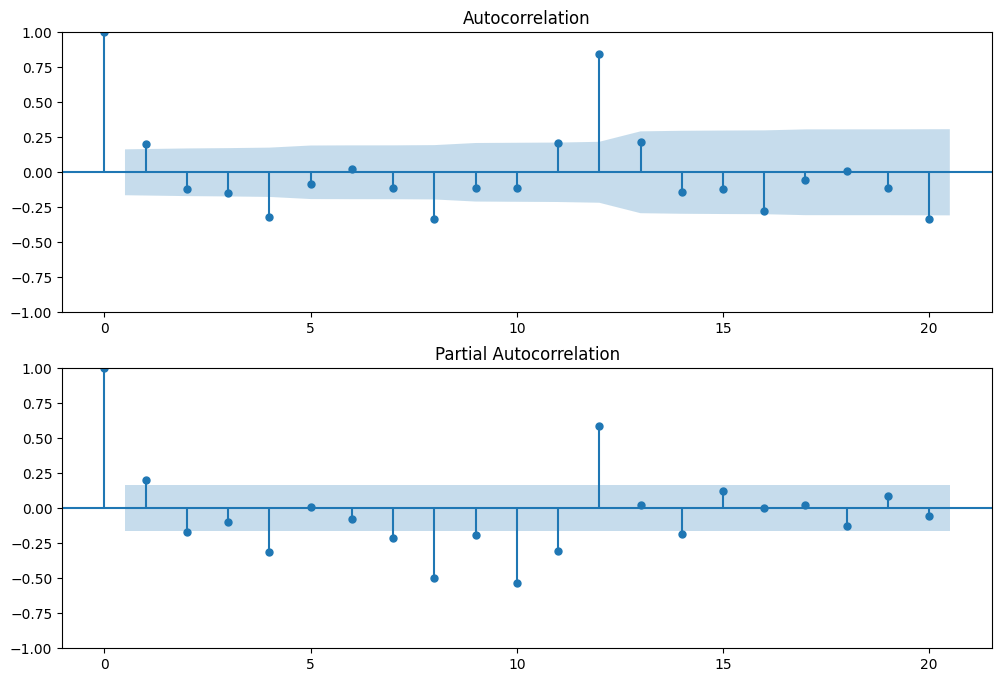

In [22]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(LDS.dropna(),lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(LDS.dropna(),lags=20,ax=ax2)

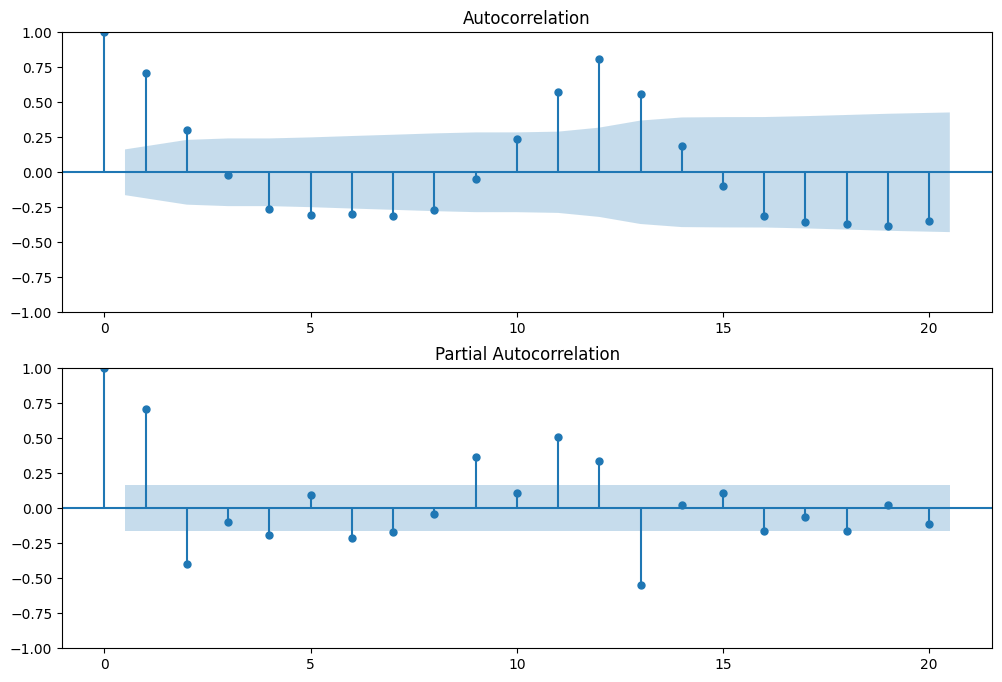

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dLS_MMA_EDWA.dropna(),lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dLS_MMA_EDWA.dropna(),lags=20,ax=ax2)

## __IMP NOTE.__
- Till here we did stationary and Find ARIMA Order
- From now we impliment the order using ARIMA / SARIMA On ORIGINAL DATASET
- WE can find __RSS__ with STATIONRY DATA LDS, SLDS FOR __Best fit__
- But RESULTS and Forecastings are should be from ORIGINAL df.


## __06 ARIMA__

### __RSS CHECKING__ (Residual Sum of Squares Value)
- Less the value Better for fitting

In [24]:
from statsmodels.tsa.arima.model import ARIMA

/home/data-1/DS_pyenvs/adatas/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/data-1/DS_pyenvs/adatas/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/data-1/DS_pyenvs/adatas/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/data-1/DS_pyenvs/adatas/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'RSS: 1.0489')

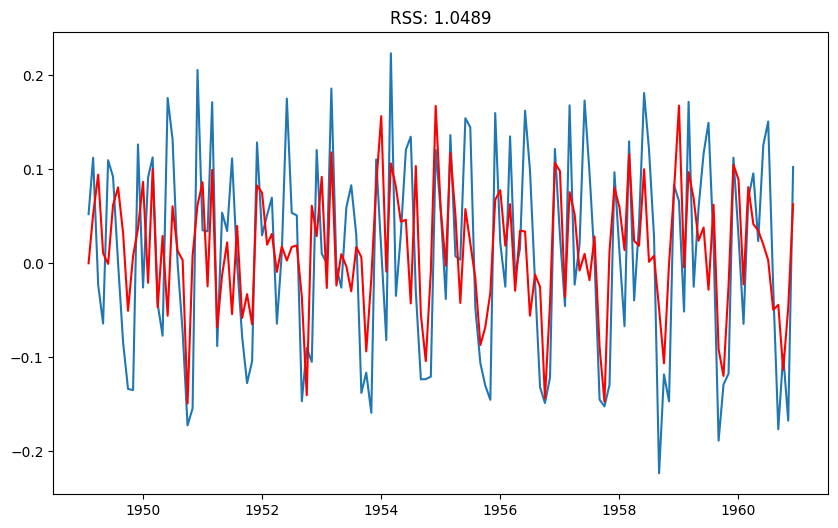

In [25]:
# RSS = Sum((Regression values - Actualvalues)Square)
# ARIMA
# Implementing on Orginal data
model = ARIMA(LDS, order=(3,1,5))
results_ARIMA = model.fit()

plt.plot(LDS)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-LDS['#Passengers'])**2))



/home/data-1/DS_pyenvs/adatas/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/data-1/DS_pyenvs/adatas/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/data-1/DS_pyenvs/adatas/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/data-1/DS_pyenvs/adatas/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'RSS: 0.8959')

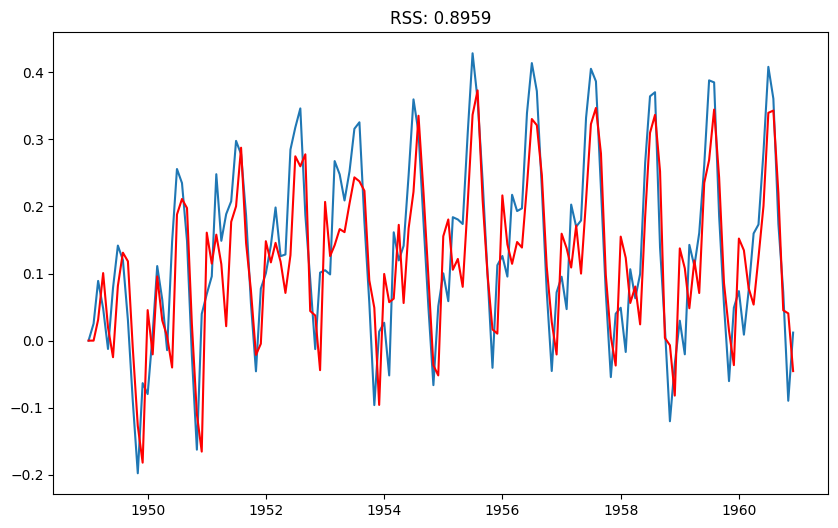

In [26]:
# RSS = Sum((Regression values - Actualvalues)Square)
# ARIMA
# Implementing on Orginal data
model = ARIMA(dLS_MMA_EDWA, order=(3,1,5))
results_ARIMA = model.fit()

plt.plot(dLS_MMA_EDWA)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-dLS_MMA_EDWA['#Passengers'])**2))



### __ARIMA ON ORIGINAL DATA__

/home/data-1/DS_pyenvs/adatas/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/data-1/DS_pyenvs/adatas/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/data-1/DS_pyenvs/adatas/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/data-1/DS_pyenvs/adatas/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'RSS: 89547.3582')

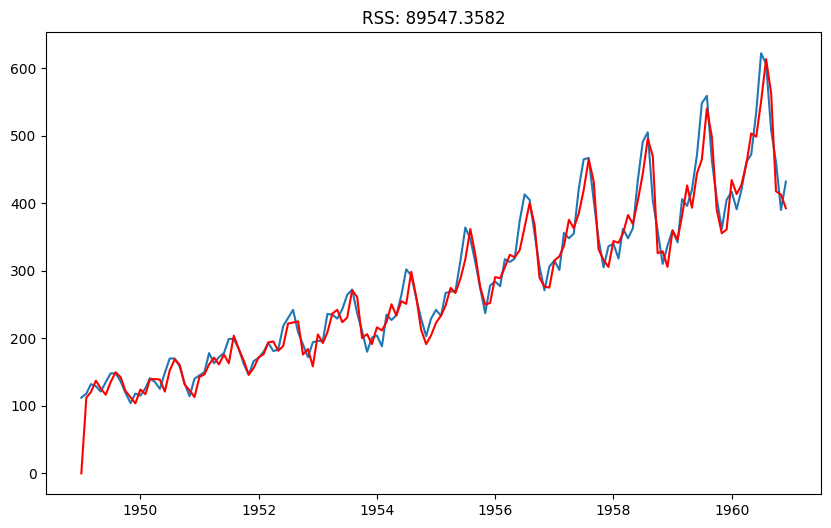

In [27]:
# ARIMA
# Implementing on Orginal data
model = ARIMA(df['#Passengers'], order=(5,1,5))
results_ARIMA = model.fit()

plt.plot(df)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-df['#Passengers'])**2)) #'RSS: 89547.3582'
# # RSS = Sum((Regression values - Actualvalues)Square)

In [28]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -656.559
Date:                Fri, 19 Jan 2024   AIC                           1335.119
Time:                        12:14:11   BIC                           1367.710
Sample:                    01-01-1949   HQIC                          1348.362
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5353      0.207      2.584      0.010       0.129       0.941
ar.L2         -0.1091      0.185     -0.589      0.556      -0.472       0.254
ar.L3          0.4098      0.180      2.280      0.023       0.057       0.762
ar.L4         -0.4566      0.179     -2.552      0.011      -0.807      -0.106
ar.L5         -0.2400      0.200     -1.199      0.231      -0.633       0.152
ma.L1         -0.4466      0.580     -0.770      0.441      -1.584       0.691
ma.L2         -0.2564      0.836     -0.307      0.759      -1.895       1.382
ma.L3         -0.6521      1.729     -0.377      0.706      -4.040       2.736
ma.L4         -0.0044      0.497     -0.009      0.993      -0.979       0.970
ma.L5          0.7958      1.148      0.693      0.488      -1.455       3.046
sigma2       582.5561    808.197      0.721      0.471   -1001.481    2166.593
===================================================================================
Ljung-Box (L1) (Q):                   1.31   Jarque-Bera (JB):                 9.36
Prob(Q):                              0.25   Prob(JB):                         0.01
Heteroskedasticity (H):               6.14   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## __07 SARIMAX__

- ### For Seasonal Data

### __RSS CHECKING IN SARIMA__

/home/data-1/DS_pyenvs/adatas/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/data-1/DS_pyenvs/adatas/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.50078D+00    |proj g|=  1.18147D+01


 This problem is unconstrained.



At iterate    5    f= -1.68952D+00    |proj g|=  6.37575D-01

At iterate   10    f= -1.73918D+00    |proj g|=  7.05070D-02

At iterate   15    f= -1.75799D+00    |proj g|=  1.13979D-01

At iterate   20    f= -1.75834D+00    |proj g|=  3.66239D-01

At iterate   25    f= -1.75871D+00    |proj g|=  2.37661D-02

At iterate   30    f= -1.75961D+00    |proj g|=  1.61644D-01

At iterate   35    f= -1.76053D+00    |proj g|=  7.60701D-02

At iterate   40    f= -1.76211D+00    |proj g|=  1.44098D-01

At iterate   45    f= -1.76453D+00    |proj g|=  5.60191D-02

At iterate   50    f= -1.76652D+00    |proj g|=  5.33087D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/data-1/DS_pyenvs/adatas/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'RSS: 0.2400')

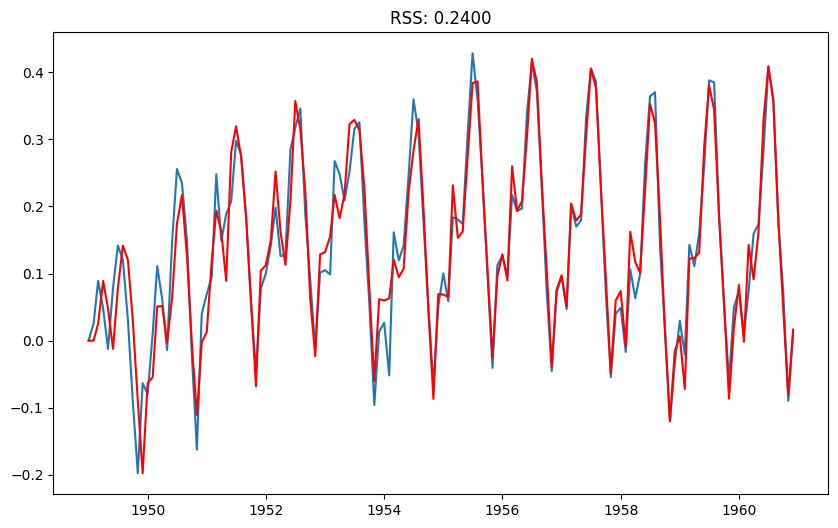

In [29]:
# Implementing on statiory data is not recomended??
# Implement on Orginal data.
import statsmodels.api as sm
# model=sm.tsa.statespace.SARIMAX(SLDS['#Passengers'],order=(1,1,1),seasonal_order=(1,1,1,12))
model=sm.tsa.statespace.SARIMAX(dLS_MMA_EDWA['#Passengers'],order=(3,1,5),seasonal_order=(3,1,5,12))
results_SARIMA=model.fit()

plt.plot(dLS_MMA_EDWA)
plt.plot(results_SARIMA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_SARIMA.fittedvalues-SLDS['#Passengers'])**2))
plt.title('RSS: %.4f'% sum((results_SARIMA.fittedvalues-dLS_MMA_EDWA['#Passengers'])**2))

# RSS = Sum((Regression values - Actualvalues)Square)
# Sesonal p d q same as normal p d q, extra seasonal shift value addded in sesoning.
# RSS Shows how good the line fit with the data.

### __SARIMA IMPLIMENTING ON ORIGINAL DATA__

/home/data-1/DS_pyenvs/adatas/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/data-1/DS_pyenvs/adatas/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.50178D+00    |proj g|=  1.20841D-01


 This problem is unconstrained.



At iterate    5    f=  3.45666D+00    |proj g|=  2.37294D-02

At iterate   10    f=  3.44075D+00    |proj g|=  2.47472D-02

At iterate   15    f=  3.43024D+00    |proj g|=  7.58078D-03

At iterate   20    f=  3.42825D+00    |proj g|=  1.45113D-02

At iterate   25    f=  3.42560D+00    |proj g|=  7.00726D-03

At iterate   30    f=  3.42377D+00    |proj g|=  2.21330D-02

At iterate   35    f=  3.42220D+00    |proj g|=  5.18631D-03

At iterate   40    f=  3.42101D+00    |proj g|=  1.52211D-02

At iterate   45    f=  3.41326D+00    |proj g|=  3.00509D-02

At iterate   50    f=  3.40993D+00    |proj g|=  3.24075D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/data-1/DS_pyenvs/adatas/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'RSS: 30836.1149')

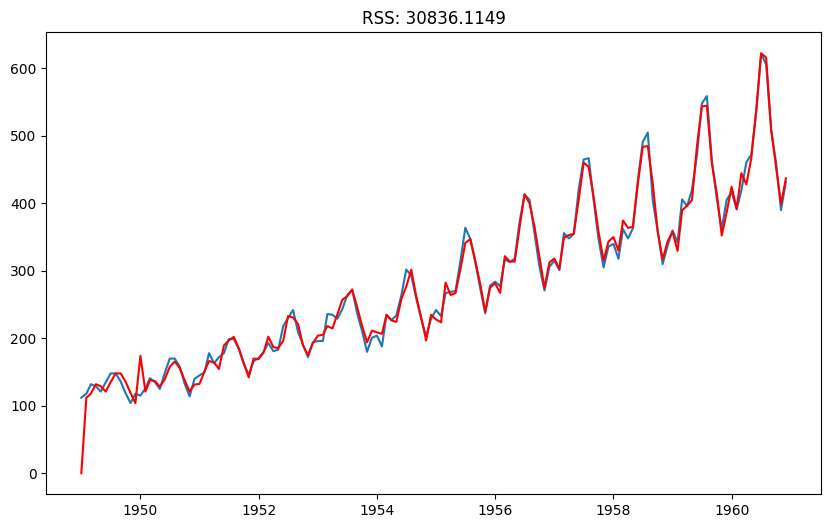

In [30]:
# Implementing on statiory data SLDS is not recomended??
# Implementing on Orginal data
import statsmodels.api as sm
# model=sm.tsa.statespace.SARIMAX(df['#Passengers'],order=(1,1,1),seasonal_order=(1,1,1,12))
model=sm.tsa.statespace.SARIMAX(df['#Passengers'],order=(3,1,5),seasonal_order=(3,1,5,12))
results_SARIMA=model.fit()

plt.plot(df)
plt.plot(results_SARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_SARIMA.fittedvalues-df['#Passengers'])**2)) # 'RSS: 30836.1149'

# RSS = Sum((Regression values - Actualvalues)Square)
# Sesonal p d q same as normal p d q, extra seasonal shift value addded in sesoning.

In [31]:
results_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(3, 1, 5)x(3, 1, 5, 12)   Log Likelihood                -491.030
Date:                            Fri, 19 Jan 2024   AIC                           1016.060
Time:                                    12:15:20   BIC                           1064.938
Sample:                                01-01-1949   HQIC                          1035.921
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9890      0.172    -11.537      0.000      -2.327      -1.651
ar.L2         -1.9014      0.235     -8.090      0.000      -2.362      -1.441
ar.L3         -0.8858      0.161     -5.493      0.000      -1.202      -0.570
ma.L1          1.5696      0.314      4.997      0.000       0.954       2.185
ma.L2          1.0957      0.308      3.558      0.000       0.492       1.699
ma.L3          0.1175      0.261      0.449      0.653      -0.395       0.630
ma.L4         -0.5452      0.215     -2.541      0.011      -0.966      -0.125
ma.L5         -0.1386      0.137     -1.009      0.313      -0.408       0.131
ar.S.L12       0.2317      5.315      0.044      0.965     -10.186      10.649
ar.S.L24       0.9108      0.836      1.089      0.276      -0.728       2.549
ar.S.L36      -0.3020      4.382     -0.069      0.945      -8.890       8.286
ma.S.L12      -0.6939      7.353     -0.094      0.925     -15.106      13.719
ma.S.L24      -0.7168      4.029     -0.178      0.859      -8.614       7.181
ma.S.L36       0.8207      5.238      0.157      0.875      -9.446      11.087
ma.S.L48      -0.0120      2.432     -0.005      0.996      -4.778       4.754
ma.S.L60       0.0385      0.735      0.052      0.958      -1.401       1.478
sigma2        83.9690    157.175      0.534      0.593    -224.088     392.026
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 5.64
Prob(Q):                              0.63   Prob(JB):                         0.06
Heteroskedasticity (H):               2.49   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
type(results_ARIMA)

statsmodels.tsa.arima.model.ARIMAResultsWrapper

## __08 Predicting__

<Axes: xlabel='Month'>

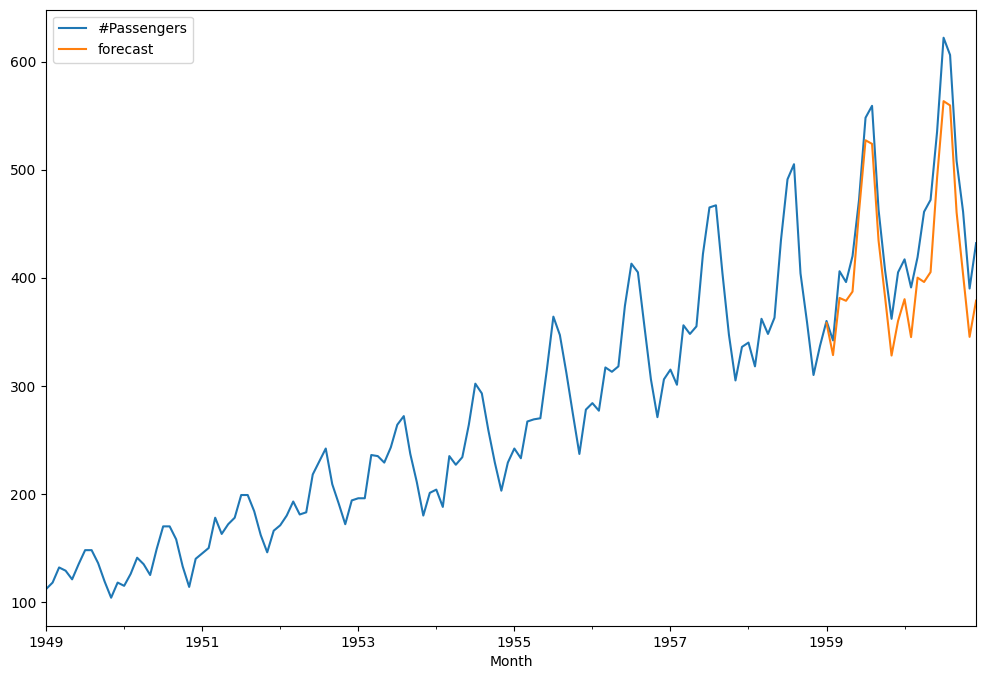

In [33]:
df['forecast']=results_SARIMA.predict(start=120,end=145,dynamic=True)
df[['#Passengers','forecast']].plot(figsize=(12,8))

## __09 Forecasting__

- __Forecasting is different from predicting and fitting ARIMA, SARIMA__
- Make Data Stationary
- find Auto regression values
- find ARIMA Order
- Apply __ARIMA/SARIMAX__ On the Original Data (df), not on stationaried data(SLDS).

In [34]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [35]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [36]:
future_datest_df.tail()

,#Passengers,forecast
1962-07-01,NaN,NaN
1962-08-01,NaN,NaN
1962-09-01,NaN,NaN
1962-10-01,NaN,NaN
1962-11-01,NaN,NaN


In [37]:
future_df=pd.concat([df,future_datest_df])

<Axes: >

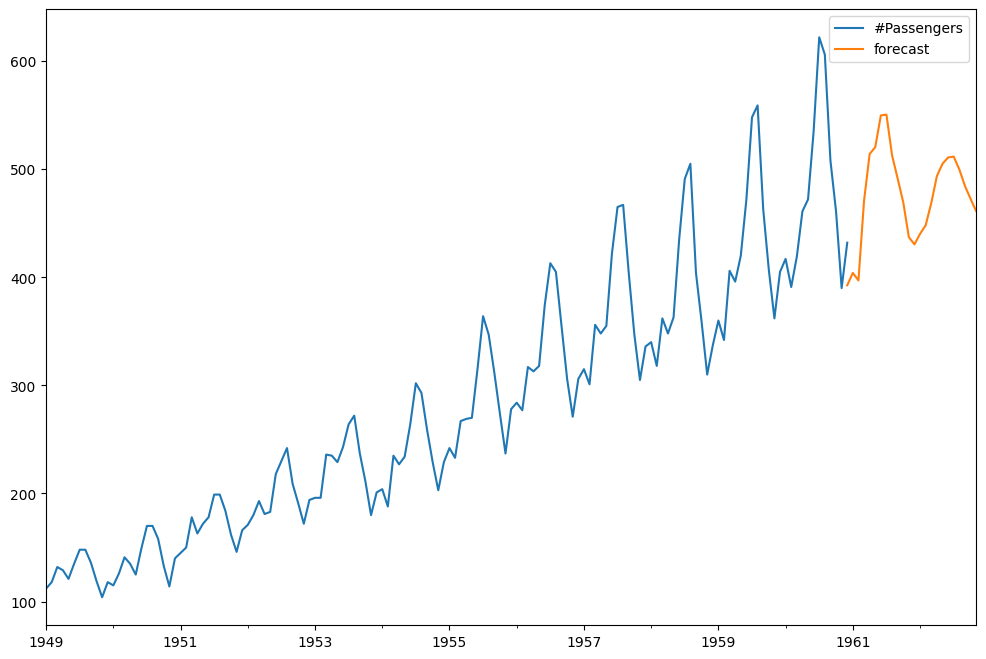

In [38]:
# ARIMA Forecast
future_df['forecast'] = results_ARIMA.predict(start = 143, end = 180, dynamic= True)  
future_df[['#Passengers', 'forecast']].plot(figsize=(12, 8)) 

<Axes: >

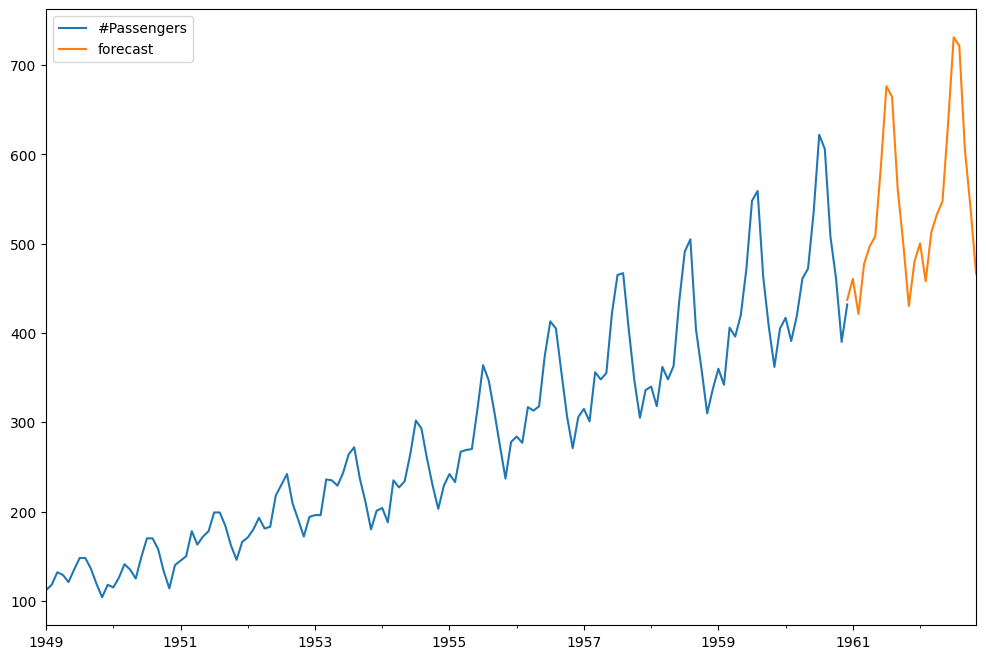

In [39]:
# SARIMA Forecast
future_df['forecast'] = results_SARIMA.predict(start = 143, end = 180, dynamic= True)  
future_df[['#Passengers', 'forecast']].plot(figsize=(12, 8)) 

In [40]:
# Concludes